# Proyecto Final: Modelo de regresión precios de vehiculos usados

# Objetivos: 
El objetivo de el proyecto es crear un modelo de regresión para predecir el precio de los vehiculos usados. 

# Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargando Dataset original y exploración de datos

In [2]:
vehicle_prices = pd.read_csv("vehicle_prices.csv")

In [3]:
vehicle_prices.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall


Aca nos podemos dar una pequeña idea de con que variables vamos a estar trabajando y como podemos ir pensando en desarrollar el proyecto y las columnas con las cuales vamos a trabajar. 

# 1. Missing Data

<AxesSubplot:>

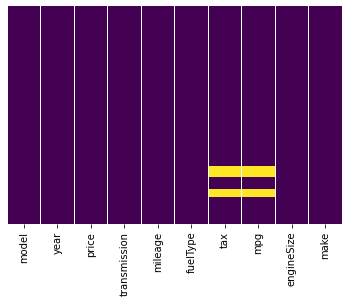

In [4]:
sn.heatmap(vehicle_prices.isnull(),yticklabels=False,cbar=False,cmap='viridis')

En este mapa de calor que generamos podemso ver que tenemos dos columnas con missing values, en tax y mpg. Las dos columnas con variables numéricas por lo cual podemos pensar más adelante en hacer una imputación a base de moda o mediana dependiendo de la situación de las columnas y como se comportan. 

# 2.Visualizando columnas categóricas

<AxesSubplot:xlabel='model', ylabel='count'>

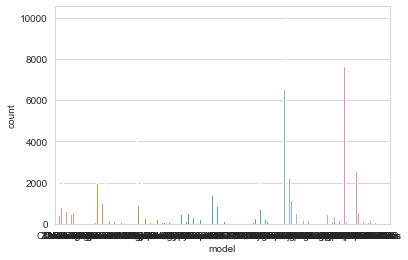

In [5]:
sn.set_style('whitegrid')
sn.countplot(x='model', data = vehicle_prices)

In [6]:
vehicle_prices.model.unique()

array(['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka X', 'Crossland X',
       'Zafira', 'Meriva', 'Zafira Tourer', 'Adam', 'Grandland X',
       'Antara', 'Insignia', 'Ampera', 'GTC', 'Combo Life', 'Vivaro',
       'Cascada', 'Kadjar', 'Agila', 'Tigra', 'Vectra', '5 Series',
       '6 Series', '1 Series', '7 Series', '2 Series', '4 Series', 'X3',
       '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2', 'X6', '8 Series',
       'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3', 'T-Roc', 'Golf',
       'Passat', 'T-Cross', 'Polo', 'Tiguan', 'Sharan', 'Up', 'Scirocco',
       'Beetle', 'Caddy Maxi Life', 'Caravelle', 'Touareg', 'Arteon',
       'Touran', 'Golf SV', 'Amarok', 'Tiguan Allspace', 'Shuttle',
       'Jetta', 'CC', 'California', 'Caddy Life', 'Caddy', 'Caddy Maxi',
       'Eos', 'Fox', 'I20', 'Tucson', 'I10', 'IX35', 'I30', 'I40',
       'Ioniq', 'Kona', 'Veloster', 'I800', 'IX20', 'Santa Fe', 'Accent',
       'Terracan', 'Getz', 'Amica', 'A1', 'A6', 'A4', 'A3', 'Q3', 'Q5',
       'A5'

Observando esta grafia de un conteo de las variable categórica Model, creo que podemos entender claramente que es una de las columnas que no vamos a utilizar en nuestro analísis ya que cuenta con muchas varibles. Esto quiere decir que si nosotros pensamos usarla tendriamos que hacer un one hot encodign para todas estas o buscar algún tipo de manerea para adaptarlo lo cual sería ineficiente.

<AxesSubplot:xlabel='year', ylabel='count'>

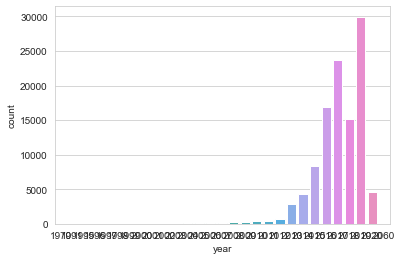

In [7]:
sn.set_style('whitegrid')
sn.countplot(x='year', data = vehicle_prices)

En esta variable podemos encontrar algo interesante, podemos ver como la mayoría de nuestras observaciones cuentan con un rango lo cual puede ser útil ya que algunos años no cuentan con tantas observaciones, por lo cual usarlas sería ineficiente, pero podriamos pensar en usar solo el rango donde de concentran nuestros datos

In [8]:
vehicle_prices.year.value_counts()

2019    29955
2017    23686
2016    16948
2018    15092
2015     8359
2020     4657
2014     4377
2013     2818
2012      702
2011      477
2010      369
2009      321
2008      233
2007      185
2006       92
2005       84
2004       55
2003       39
2002       36
2001       20
2000        9
1998        9
1999        6
1997        4
1970        2
1996        2
1995        1
2060        1
1991        1
Name: year, dtype: int64

Podemos ver que nuestros datos se encuentran dentro de el rango de podriamos asegurarnos que desde el 2013 para arriba, lo cual lo podriamos usar y quedarnos solo con estas variabels y si podiramos realizar un one hot encoding

<AxesSubplot:xlabel='transmission', ylabel='count'>

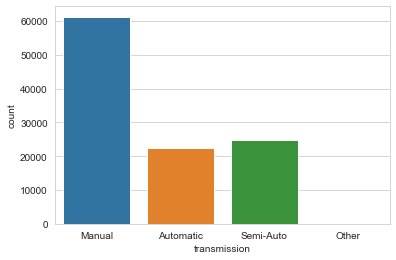

In [9]:
sn.set_style('whitegrid')
sn.countplot(x='transmission', data = vehicle_prices)

La transmisión del carro puede ser bastante útil, ya que con esta podemos hacer un one Hot econding que no entorpecería tanto el proceso como las variables que tienen muchas características.

In [10]:
vehicle_prices.transmission.value_counts()

Manual       61308
Semi-Auto    24903
Automatic    22319
Other           10
Name: transmission, dtype: int64

Inclusive podriamos pensar si usar other es muy beneficioso ya que solo cuenta con dos observaciones

<AxesSubplot:xlabel='fuelType', ylabel='count'>

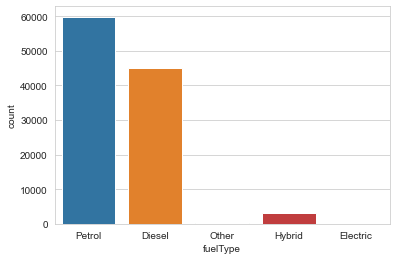

In [11]:
sn.set_style('whitegrid')
sn.countplot(x='fuelType', data = vehicle_prices)

In [12]:
vehicle_prices.fuelType.value_counts()

Petrol      59875
Diesel      45177
Hybrid       3229
Other         253
Electric        6
Name: fuelType, dtype: int64

Igual que la variable que consideramos de transmissión, en other y electric hay muy pocas observaciones que pueden no tener significancia como una variable independeinte, ya que son muy pocas observaciones

<AxesSubplot:xlabel='make', ylabel='count'>

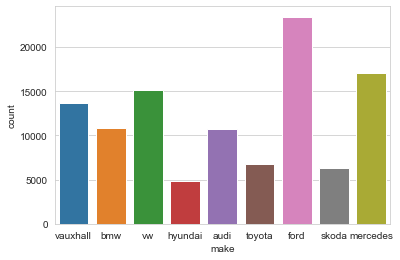

In [13]:
sn.set_style('whitegrid')
sn.countplot(x='make', data = vehicle_prices)

Si necesidad de hacer tanto problema, vemos que es una variable categorica bastante bien distribuida y que podriamos usarla como variables que peuden ayudarnos a hacer una buena predicción.

# 3. Entendiendo variables numéricas y su distribución

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage'>

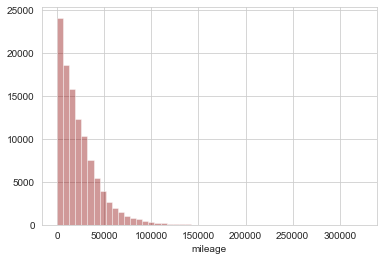

In [14]:
sn.distplot(vehicle_prices.mileage, kde=False, color='darkred')

Aqui podemos observar como se comporta el mileage de los carros, la mayoría estan en 0 y tiene un pequeño skew hacia la derecha, vemos que esto no es una distribución normal, por lo cual debemos de normalizar nuestros datos para que se comporte como tal

<AxesSubplot:xlabel='tax'>

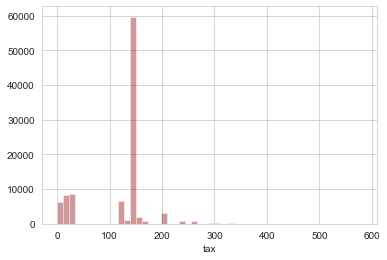

In [15]:
sn.distplot(vehicle_prices.tax.dropna(), kde=False, color='darkred')

La variables Tax sin los N/A's que encontramos anteriormente tiene una distribución un poco extraña, pero la podemos arreglar facilemente usando una normalización y estandarizandolos

<AxesSubplot:xlabel='mpg'>

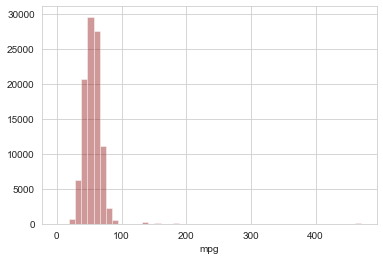

In [16]:
sn.distplot(vehicle_prices.mpg.dropna(), kde=False, color='darkred')

En la variable mpg podemos ver que tiene una distribución normal un poco más acercada pero no es pefecta como quisieramos tenerla, por lo cual debemos de aplicarle alguna transformación

<AxesSubplot:xlabel='engineSize'>

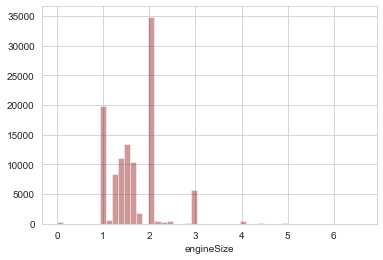

In [17]:
sn.distplot(vehicle_prices.engineSize, kde=False, color='darkred')

Igual que todas las anteriores, a engineSize tambien debemos de aplicarle alguan transformación para que se comporte de mejor manera y se acerque más a una distribución normal 

# 4. Imputación para Missing value en Tax y Mpg

Para empesar con este proceso debemos de ser un poco inteligentes y no irnos apresuradamente a tomar una decisión si lo vamos a hacer por la media o la mediana. La moda en este caso considero que no es del todo apropiada al contar con una variable numérica, por lo cual no usaremos este proceso. 

#### Revisando tipo de Tax por marca de vehiculo

<AxesSubplot:xlabel='make', ylabel='tax'>

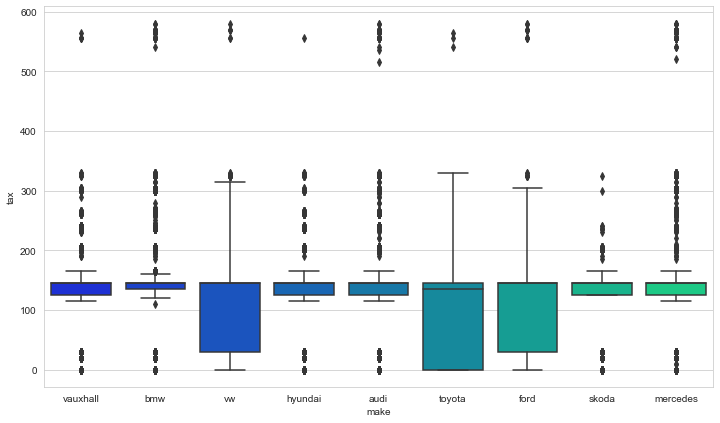

In [18]:
plt.figure(figsize=(12,7))
sn.boxplot(x='make', y='tax', data=vehicle_prices, palette= 'winter')

In [19]:
vehicle_prices.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [20]:
vehicle_prices['tax'].mean()

120.29983768034117

In [21]:
vehicle_prices['mpg'].median()

54.3

Tome la decisión de hacer un proceso de media para las dos formas

In [22]:
vehicle_prices['tax'].fillna(vehicle_prices['tax'].mean(), inplace = True)

In [23]:
vehicle_prices['mpg'].fillna(vehicle_prices['mpg'].mean(), inplace = True)

<AxesSubplot:>

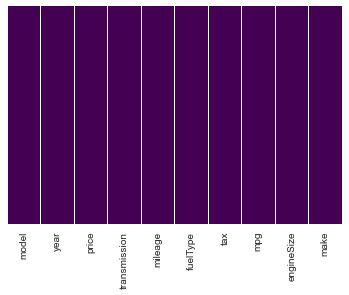

In [24]:
sn.heatmap(vehicle_prices.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Como podemos ver volvimos a hacer nuesto heatmap para ver si teniamos missing values y podemos ver que no los tenemos entonces podemos seguir adelante con nuestro proceso

## 5. Realizando el Filtro para Year

In [25]:
years = [2013,2014,2015,2016,2017,2018,2019]

In [26]:
vehicle_prices.year.isin(years)

0          True
1          True
2          True
3          True
4          True
          ...  
108535    False
108536    False
108537     True
108538     True
108539     True
Name: year, Length: 108540, dtype: bool

In [27]:
vehicle_prices_filtered = vehicle_prices[vehicle_prices.year.isin(years)]

In [28]:
vehicle_prices_filtered.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall


In [29]:
vehicle_prices_filtered.size

1012350

In [30]:
vehicle_prices_filtered.year.value_counts()

2019    29955
2017    23686
2016    16948
2018    15092
2015     8359
2014     4377
2013     2818
Name: year, dtype: int64

Ahora ya tenemos los datos con los que vamos a trabajar, ya podemos empezar a hacer un proceso más especifico de machine learning y jugar con nuestros datos. 

In [31]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
vehicle_prices_numeric = vehicle_prices_filtered.select_dtypes(include=numerics)

<AxesSubplot:>

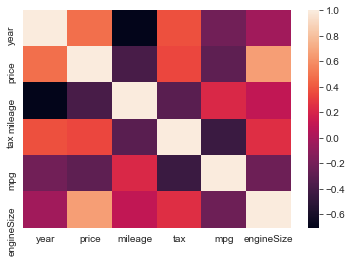

In [32]:
cor = vehicle_prices_numeric .corr()
sn.heatmap(cor, xticklabels = cor.columns, yticklabels=cor.columns)

Como podemos observan en nuestro heatmap de nuestras variables numericas no existe ninguna correlación que nos procupe de sobre manera, con lo cual podemos seguir trabajando con ellas

# Separando Nuestras variables en X y Y para preprocesamiento

In [33]:
df = vehicle_prices_filtered.sample(frac = 1)

In [34]:
x_inicial = df.drop('price', axis = 1)
y = df.price

In [35]:
y.head()

18449    15381
89275    26490
66477    17997
77209    10789
17491    29990
Name: price, dtype: int64

In [36]:
print(x_inicial.shape, y.shape)

(101235, 9) (101235,)


In [37]:
x_nomodel = x_inicial.drop('model', axis = 1)
x_nomodel['year'] = x_nomodel['year'].astype(str)

In [38]:
x_nomodel.head()

,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
18449,2017,Semi-Auto,74652,Diesel,125.0,60.1,2.0,bmw
89275,2019,Manual,6000,Diesel,145.0,42.8,2.0,skoda
66477,2018,Manual,3584,Diesel,145.0,47.9,2.0,ford
77209,2017,Manual,21847,Petrol,145.0,60.1,1.0,ford
17491,2016,Semi-Auto,30241,Petrol,300.0,34.0,3.0,bmw


In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
x_numerical = x_nomodel.select_dtypes(include=numerics)
x_categorical = x_nomodel.select_dtypes(exclude=numerics)

In [40]:
x_numerical.head()

,mileage,tax,mpg,engineSize
18449,74652,125.0,60.1,2.0
89275,6000,145.0,42.8,2.0
66477,3584,145.0,47.9,2.0
77209,21847,145.0,60.1,1.0
17491,30241,300.0,34.0,3.0


In [41]:
x_categorical

,year,transmission,fuelType,make
18449,2017,Semi-Auto,Diesel,bmw
89275,2019,Manual,Diesel,skoda
66477,2018,Manual,Diesel,ford
77209,2017,Manual,Petrol,ford
17491,2016,Semi-Auto,Petrol,bmw
...,...,...,...,...
54267,2017,Manual,Diesel,audi
79973,2018,Manual,Petrol,ford
25245,2019,Semi-Auto,Petrol,vw
26624,2019,Semi-Auto,Petrol,vw


Ahora que tenemos separadas nuestras variables ya podemos hacer el debido procesamiento para cada una de ellas 

# Standar scaler para variables numéricas

In [42]:
scaler = StandardScaler()
x_numeric_scalar = scaler.fit_transform(x_numerical)

In [43]:
x_numeric_df = DataFrame(x_numeric_scalar)

In [44]:
x_numeric_df.head()

,0,1,2,3
0,2.739652,0.121852,0.287686,0.629075
1,-0.873454,0.460331,-0.837005,0.629075
2,-1.000606,0.460331,-0.505449,0.629075
3,-0.039438,0.460331,0.287686,-1.187277
4,0.402333,3.083544,-1.409103,2.445426


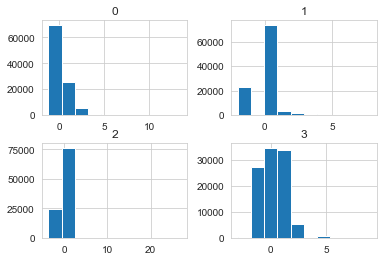

In [45]:
x_numeric_df.hist()
plt.show()

In [46]:
x_numeric_names = x_numeric_df.rename(columns = {0: 'mileage', 1: 'tax', 2 : 'mpg', 3 : 'enginesize'}, inplace = False)
x_numeric_names

,mileage,tax,mpg,enginesize
0,2.739652,0.121852,0.287686,0.629075
1,-0.873454,0.460331,-0.837005,0.629075
2,-1.000606,0.460331,-0.505449,0.629075
3,-0.039438,0.460331,0.287686,-1.187277
4,0.402333,3.083544,-1.409103,2.445426
...,...,...,...,...
101230,0.164817,0.460331,0.651748,0.629075
101231,-0.292953,0.042306,-0.033025,-1.187277
101232,-1.186598,0.460331,-0.706983,-0.279101
101233,-0.979765,0.460331,-0.654974,-0.279101


Como podemos ver ahora nuestra data esta estandarizada y podemos seguir con el proceso dentro de las variables categoricas

# One Hot enconding variables categoricas

In [47]:
x_categorical_encoded = DataFrame(OneHotEncoder().fit_transform(x_categorical).toarray())
x_categorical_encoded

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
101232,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101233,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Combinando nuestras X's ya trabajadas

In [48]:
x_cat_array = x_categorical_encoded.to_numpy()
x_num_array = x_numeric_names.to_numpy

In [49]:
x_complete = np.hstack((x_categorical_encoded,x_numeric_names))

In [50]:
x_dataframe = DataFrame(x_complete)

<AxesSubplot:>

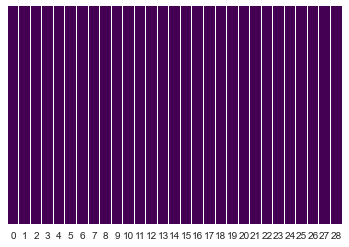

In [51]:
sn.heatmap(x_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ya tenemos nuestras x trabajadas y listas para ser entrenadas en un modelo, por lo cual seguiremos con el proceso

# Separando Nuestros datos entre training y test set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_dataframe, y, test_size=0.3, random_state=42)

In [53]:
print(X_train.shape,y_train.shape)

(70864, 29) (70864,)


In [54]:
print(X_test.shape,y_test.shape)

(30371, 29) (30371,)


# Modelo de Regresión Lineal múltiple

In [55]:
linear_regression = linear_model.LinearRegression()

In [56]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = linear_regression.predict(X_test)

In [58]:
print('Coefficients: \n', linear_regression.coef_)

Coefficients: 
 [-3.88571362e+13 -3.88571362e+13 -3.88571362e+13 -3.88571362e+13
 -3.88571362e+13 -3.88571362e+13 -3.88571362e+13  1.37315861e+14
  1.37315861e+14  1.37315861e+14  1.37315861e+14 -1.15499029e+15
 -1.15499029e+15 -1.15499029e+15 -1.15499029e+15 -1.15499029e+15
 -6.53982582e+14 -6.53982582e+14 -6.53982582e+14 -6.53982582e+14
 -6.53982582e+14 -6.53982582e+14 -6.53982582e+14 -6.53982582e+14
 -6.53982582e+14 -1.59707031e+03 -4.27148438e+02 -3.43450684e+02
  5.29942432e+03]


In [59]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.78


Con este modelo que creamos podemos ver que obtenemos un R^2 de 0.79 por lo cual trataremos de hacer otro modelo con solo las variables numéricas para ver que tal nos queda

# Modelo de Regresión Lineal Múltiple con variables numéricas

In [60]:
x_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.739652,0.121852,0.287686,0.629075
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.873454,0.460331,-0.837005,0.629075
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.000606,0.460331,-0.505449,0.629075
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.039438,0.460331,0.287686,-1.187277
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.402333,3.083544,-1.409103,2.445426


In [61]:
x_numeric_names.head()

,mileage,tax,mpg,enginesize
0,2.739652,0.121852,0.287686,0.629075
1,-0.873454,0.460331,-0.837005,0.629075
2,-1.000606,0.460331,-0.505449,0.629075
3,-0.039438,0.460331,0.287686,-1.187277
4,0.402333,3.083544,-1.409103,2.445426


In [62]:
X_train_num , X_test_num, y_train_num, y_test_num = train_test_split(x_numeric_names, y, test_size=0.3, random_state=42)

In [63]:
linear_regression_1 = linear_model.LinearRegression()
linear_regression_1.fit(X_train_num, y_train_num)

LinearRegression()

In [64]:
y_pred_num = linear_regression_1.predict(X_test_num)

In [65]:
print('Coefficients: \n', linear_regression_1.coef_)

Coefficients: 
 [-4115.3199039    145.88378397  -234.68888015  6430.08864656]


In [66]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test_num, y_pred_num))

Coefficient of determination: 0.65


Con el modelo de regresión lineal solo con nuestras variables numéricas logramos ver que obtenemos un R^2 menor que en el modelo combinado, pero tiene bastante poder de predicción, por lo cual correremos un último modelo completo con otra herramienta para comprobar que variables son significativas y usarlas solo a ellas.

# Chekeando la calidad de la primera regresión 

In [67]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions

,Actual,Predicted
96900,21995,23785.75
11755,16499,10641.50
101660,79989,46584.25
50784,31490,29261.25
92269,30572,25406.25
...,...,...
105178,11990,22102.00
26372,15250,19382.75
25910,12191,11711.50
46340,15250,17383.75


aca podemos ver que no estasmo prediciendo tan bien pero si nos estasmo acercando un poco, ahora haremos lo mismo para la variable con solo numéricas

In [68]:
df_predictions_num = pd.DataFrame({'Actual': y_test_num, 'Predicted': y_pred_num})
df_predictions_num

,Actual,Predicted
96900,21995,18271.951644
11755,16499,14124.153120
101660,79989,48789.661857
50784,31490,24261.952944
92269,30572,18552.299485
...,...,...
105178,11990,21560.139218
26372,15250,17685.859209
25910,12191,14342.355125
46340,15250,12401.714936


Con lo mismo, logramos ver que tenemos un acercamiento pero no del todo exacto

In [69]:
y_train.shape

(70864,)